# Modeling Analysis

In [1]:
import configuration
import pandas as pd
from utils import plot_scatter

out_path = configuration.output_path + r"/plots/modeling_analysis/"

In [2]:
final_result = pd.read_csv(configuration.output_path + r"/tables/final_result_modeling.csv")

In [3]:
final_result

,Model,Window Size,Look Ahead,Indexed,MSE Train,MAE Train,MSE Test,MAE Test,Exp Train,Std Train,IC Train,Exp Test,Std Test,IC Test,Sharp Ratio Train,Sharp Ratio Test
0,CNN,52,1,True,0.045494,0.162938,7.270462,1.936327,2.203271,16.985623,0.000552,2.924148,26.691746,0.350439,0.129714,0.109553
1,CNN,52,1,False,0.000522,0.016379,0.000677,0.018055,7.337826,156.878569,0.014806,6.887241,77.347480,-0.018706,0.046774,0.089043
2,MLP,52,1,True,0.157813,0.325067,3.138467,1.447363,2.198410,20.965384,-0.001382,3.527386,30.490458,0.351472,0.104859,0.115688
3,MLP,52,1,False,0.000496,0.015958,0.000666,0.017780,7.400272,156.724488,0.190784,3.324321,27.328776,-0.008262,0.047218,0.121642
4,LSTM,52,1,True,0.089522,0.217641,48.391506,5.738370,1.597929,15.005042,0.013536,2.250365,18.719862,0.350194,0.106493,0.120213
5,LSTM,52,1,False,0.000535,0.016563,0.000652,0.017575,1.717479,14.988193,0.045279,2.960387,26.654049,0.144561,0.114589,0.111067
6,CNN,52,4,True,0.168695,0.325223,6.016424,1.753636,0.056266,0.357543,0.086464,0.047116,0.419093,0.405046,0.157368,0.112424
7,CNN,52,4,False,0.001466,0.027692,0.002632,0.036415,0.482660,1.462052,0.417172,0.370876,2.117936,0.062606,0.330125,0.175112
8,MLP,52,4,True,0.155595,0.299384,13.891012,2.608694,0.073788,0.430583,0.160529,0.079509,0.392339,0.433781,0.171369,0.202655
9,MLP,52,4,False,0.001628,0.029051,0.002514,0.035369,0.438393,1.460534,0.333843,0.320780,1.136209,0.109829,0.300159,0.282325


In [4]:
final_result.groupby(['Model'])[['Sharp Ratio Train', 'Sharp Ratio Test']].mean()

,Sharp Ratio Train,Sharp Ratio Test
Model,,
CNN,0.428704,0.129221
LSTM,0.292500,0.092250
MLP,0.385003,0.169165


In [5]:
final_result.groupby(['Look Ahead'])[['Sharp Ratio Train', 'Sharp Ratio Test']].mean()

,Sharp Ratio Train,Sharp Ratio Test
Look Ahead,,
1,0.091608,0.111201
4,0.237716,0.198130
13,0.389709,-0.073961
52,0.755911,0.285478


In [6]:
final_result.groupby(['Indexed'])[['Sharp Ratio Train', 'Sharp Ratio Test']].mean()

,Sharp Ratio Train,Sharp Ratio Test
Indexed,,
False,0.607566,0.214024
True,0.129906,0.046399


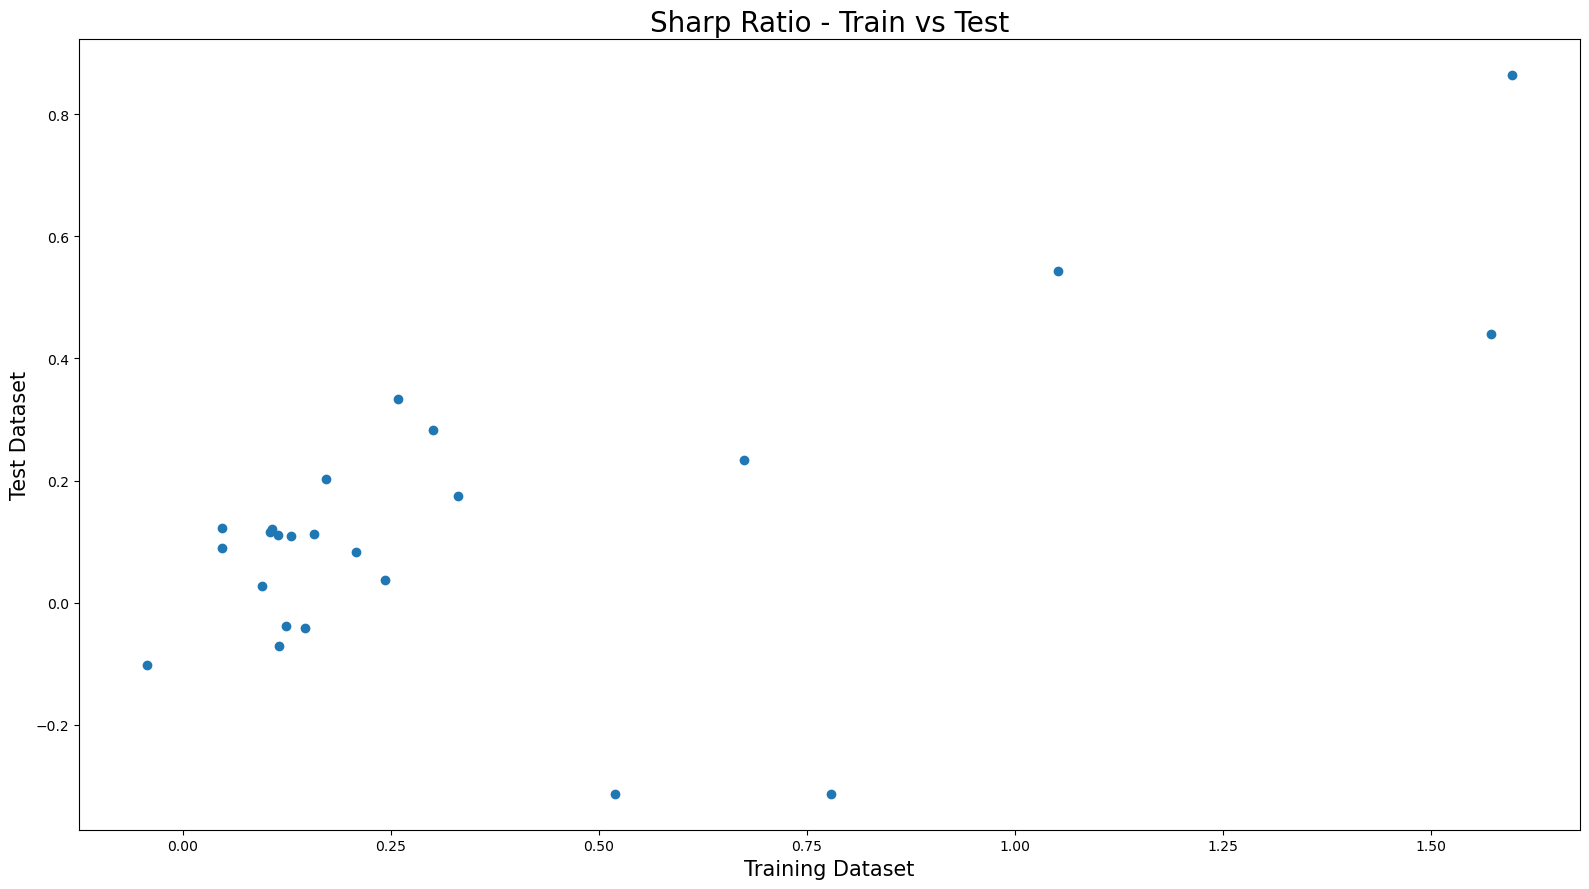

In [7]:
plot_scatter(final_result['Sharp Ratio Train'], final_result['Sharp Ratio Test'], xlabel='Training Dataset', ylabel='Test Dataset', title='Sharp Ratio - Train vs Test', output_path=out_path)

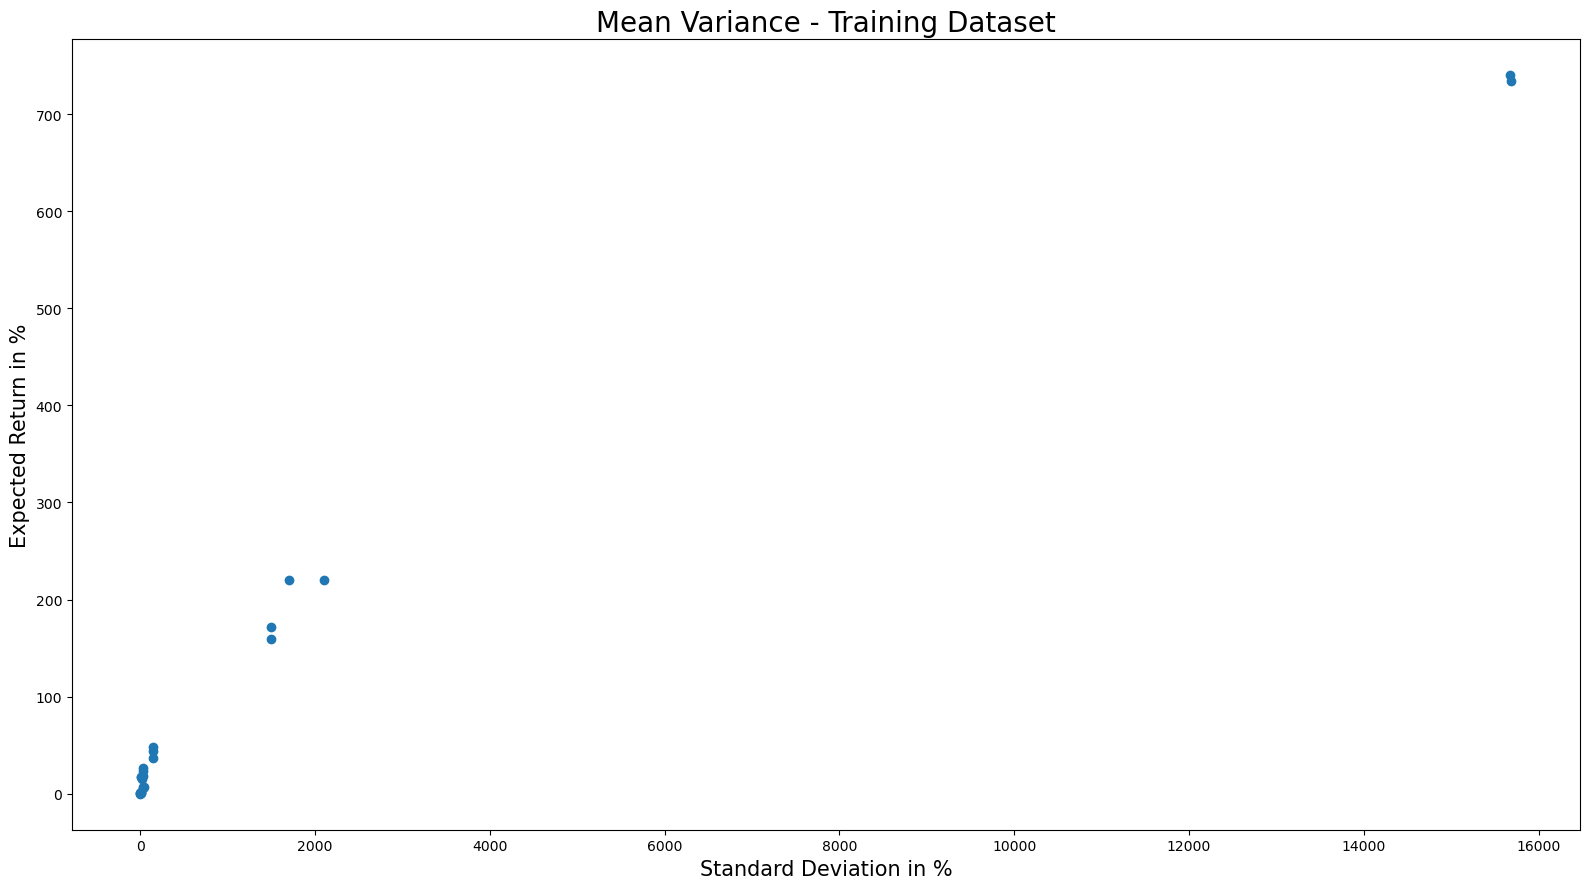

In [8]:
plot_scatter(100 * final_result['Std Train'], 100 * final_result['Exp Train'], ylabel='Expected Return in %', xlabel='Standard Deviation in %', title='Mean Variance - Training Dataset', output_path=out_path)

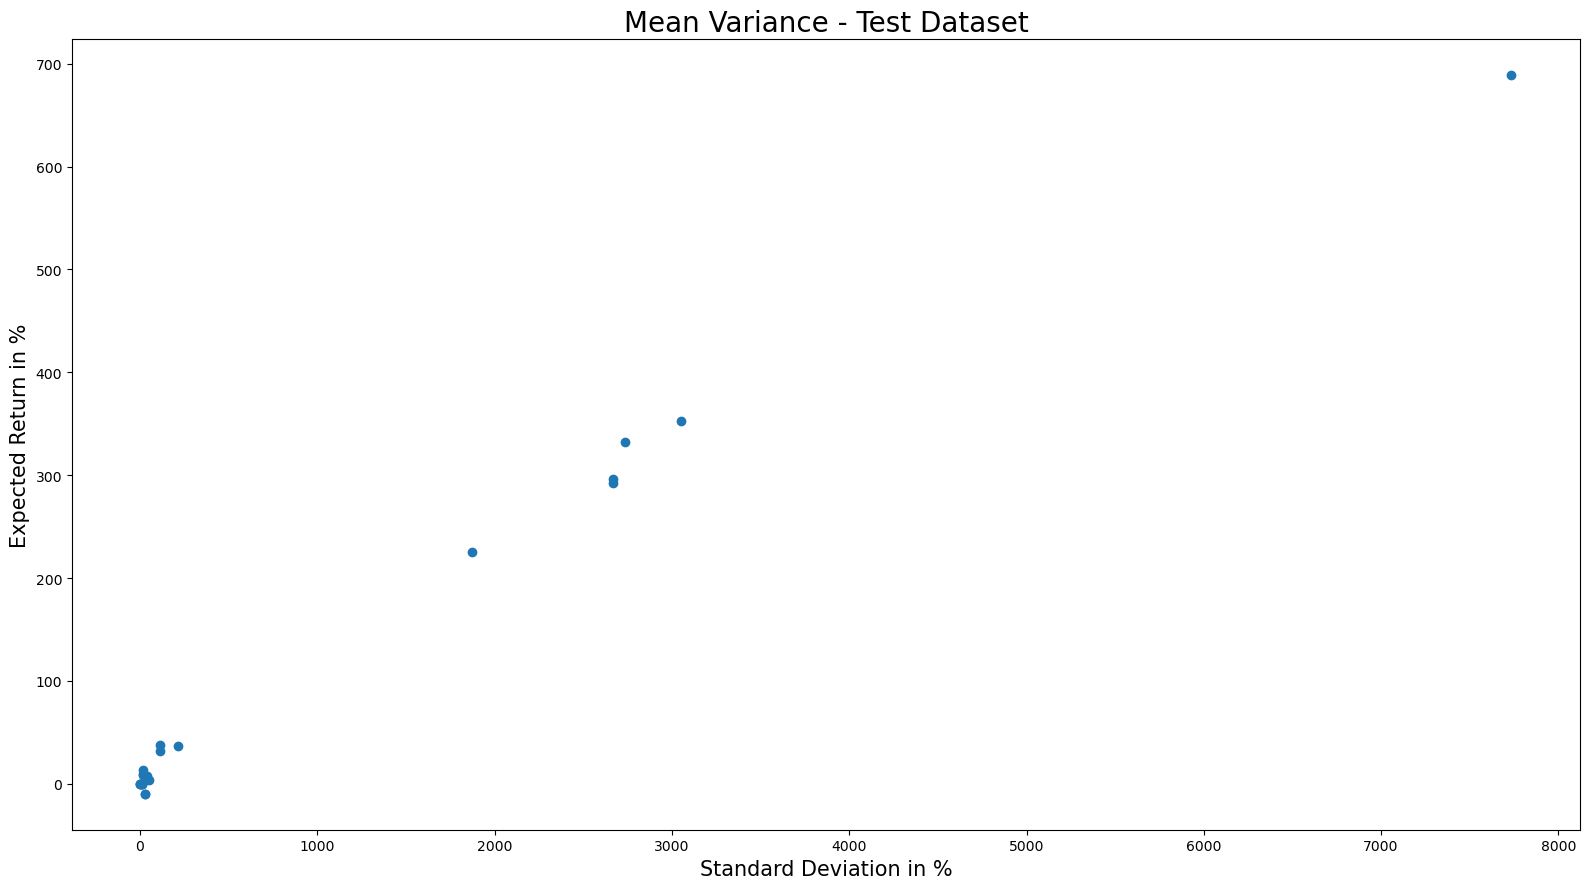

In [9]:
plot_scatter(100 * final_result['Std Test'], 100 * final_result['Exp Test'], ylabel='Expected Return in %', xlabel='Standard Deviation in %', title='Mean Variance - Test Dataset', output_path=out_path)

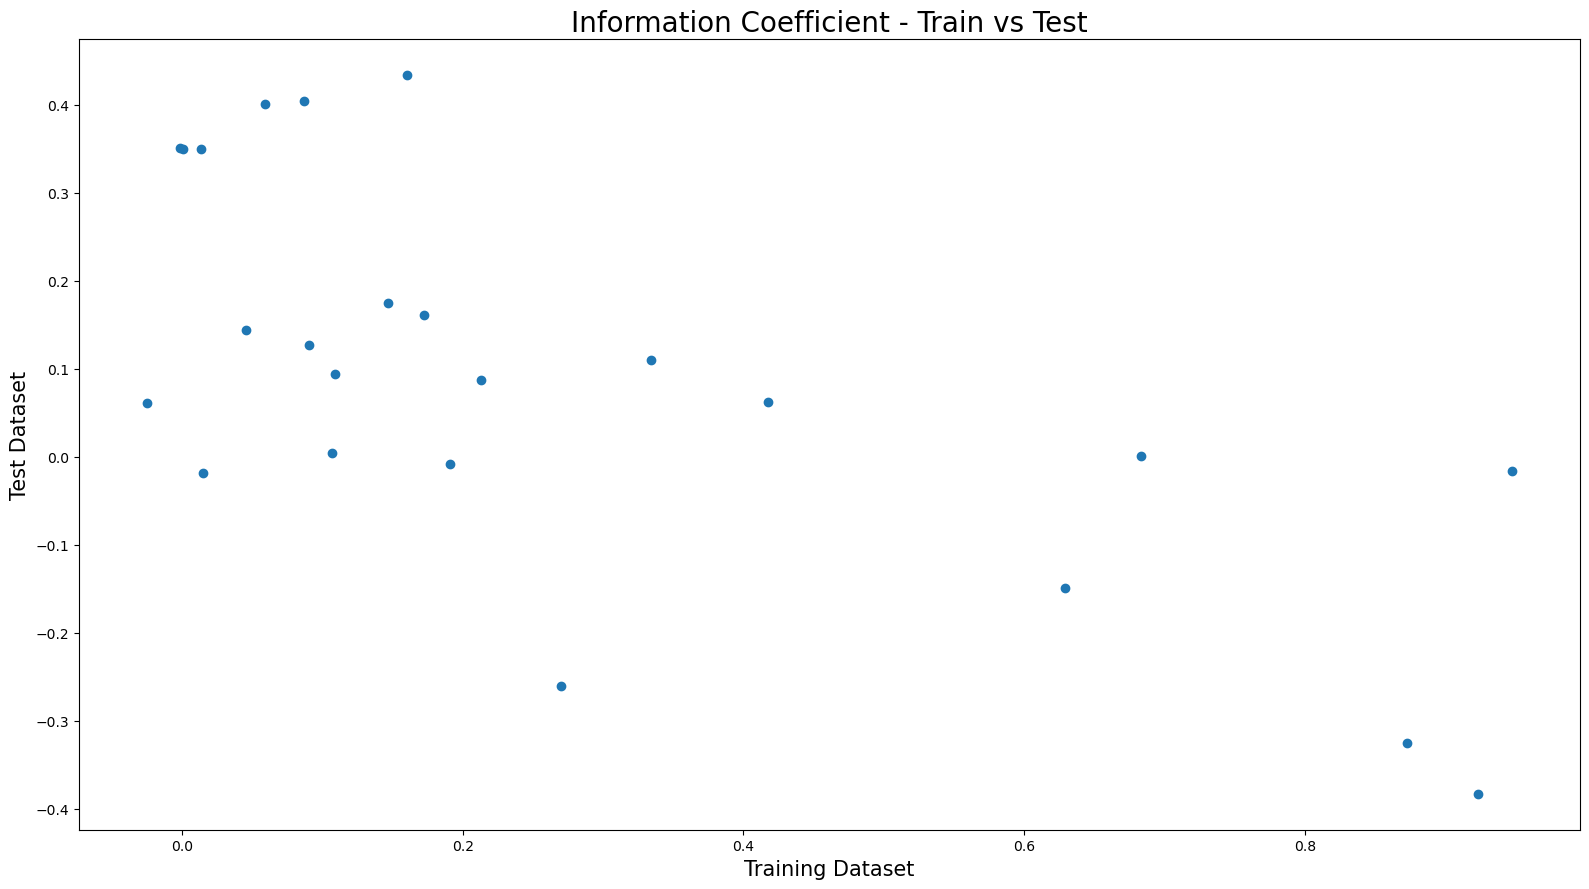

In [10]:
plot_scatter(final_result['IC Train'], final_result['IC Test'], xlabel='Training Dataset', ylabel='Test Dataset', title='Information Coefficient - Train vs Test', output_path=out_path)

In [11]:
100 * final_result.groupby("Indexed")[['Std Test', 'Exp Test']].mean()

,Std Test,Exp Test
Indexed,,
False,1143.323937,120.355911
True,646.733809,73.843051


In [12]:
100 * final_result.groupby("Look Ahead")[['Std Test', 'Exp Test']].mean()

,Std Test,Exp Test
Look Ahead,,
1,3453.872843,364.564137
4,94.973759,20.619390
13,21.237674,-1.990618
52,10.031216,5.205017


In [13]:
100 * final_result.groupby("Look Ahead")[['Std Train', 'Exp Train']].mean()

,Std Train,Exp Train
Look Ahead,,
1,6359.121651,374.253134
4,91.009686,24.788509
13,22.077652,11.944915
52,7.234009,8.482667


In [16]:
import numpy as np
from data_loading import split_dataset, load_data


for look_ahead in [1, 4, 13, 52]:
    train_set, val_set, test_set, = split_dataset(load_data(),
                                                  window_size=52,
                                                  prediction_length=1,
                                                  look_ahead=look_ahead,
                                                  scale_target=False,
                                                  fixed_feature_size=None,
                                                  is_indexed=False
                                                  )
    targets_train = np.array([train_set[i][1] for i in range(len(train_set))])
    targets_test = np.array([test_set[i][1] for i in range(len(test_set))])
    
    exp_train  = targets_train.mean()
    std_train = targets_train.std()
    
    exp_test  = targets_test.mean()
    std_test = targets_test.std()
    
    sharp_ratio_train = (exp_train - configuration.risk_free_rate) / std_train
    sharp_ratio_test = (exp_test - configuration.risk_free_rate) / std_test
    
    print(f"Sharp Ratio on the Train set for a look-ahead of {look_ahead}: ", sharp_ratio_train)
    print(f"Sharp Ratio on the Test set for a look-ahead of {look_ahead}: ", sharp_ratio_test)
    

Sharp Ratio on the Train set for a look-ahead of 1:  0.09093591
Sharp Ratio on the Test set for a look-ahead of 1:  0.10429011
Sharp Ratio on the Train set for a look-ahead of 4:  0.18590227
Sharp Ratio on the Test set for a look-ahead of 4:  0.21759513
Sharp Ratio on the Train set for a look-ahead of 13:  0.33235678
Sharp Ratio on the Test set for a look-ahead of 13:  0.4517579
Sharp Ratio on the Train set for a look-ahead of 52:  0.57107854
Sharp Ratio on the Test set for a look-ahead of 52:  0.8687328


In [17]:
final_result.groupby(['Look Ahead'])[['Sharp Ratio Train', 'Sharp Ratio Test']].max()

,Sharp Ratio Train,Sharp Ratio Test
Look Ahead,,
1,0.129714,0.121642
4,0.330125,0.333002
13,0.778939,0.234318
52,1.597057,0.863597
